In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import torch
from pmdarima.arima import auto_arima
import re
import seaborn as sns

plt.style.use("ggplot")

import os
os.makedirs("figures", exist_ok=True)

## Data

In [399]:
data = pd.read_csv("DataAssignment3.csv")

government = data.Government
data["NumberWordsLog"] = np.log(data.NumberWords)
data["NumberWordsDiff1"] = data["NumberWords"] - np.roll(data["NumberWords"], 1, axis=0)
data["NumberWordsDiff1"][0] = np.NaN
data["NumberWordsDiff2"] = data["NumberWordsDiff1"] - np.roll(data["NumberWordsDiff1"], 1, axis=0)
data["NumberWordsLogDiff1"] = data["NumberWordsLog"] - np.roll(data["NumberWordsLog"], 1, axis=0)
data["NumberWordsLogDiff2"] = data["NumberWordsLogDiff1"] - np.roll(data["NumberWordsLogDiff1"], 1, axis=0)
# data["NumberWordsDiff1Log"] = np.log(data["NumberWordsDiff1"])
# data["NumberWordsDiff2Log"] = np.log(data["NumberWordsDiff2"])

data = pd.get_dummies(data)
data    

,Date,NumberWords,NumberWordsLog,NumberWordsDiff1,NumberWordsDiff2,NumberWordsLogDiff1,NumberWordsLogDiff2,Government_Conservative,Government_Independent,Government_Social Democrats,Government_Social Liberals,Government_Venstre
0,1919,156684,11.961986,NaN,NaN,-5.282254,-5.312076,0,0,0,1,0
1,1920,170624,12.047218,13940.0,NaN,0.085231,5.367485,0,0,0,0,1
2,1921,173917,12.066333,3293.0,-10647.0,0.019116,-0.066115,0,0,0,0,1
3,1922,190745,12.158693,16828.0,13535.0,0.092359,0.073243,0,0,0,0,1
4,1923,192954,12.170207,2209.0,-14619.0,0.011514,-0.080845,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
97,2016,26999144,17.111316,1092379.0,1534740.0,0.041301,0.058232,0,0,0,0,1
98,2017,27356201,17.124454,357057.0,-735322.0,0.013138,-0.028163,0,0,0,0,1
99,2018,29523506,17.200697,2167305.0,1810248.0,0.076244,0.063105,0,0,0,0,1
100,2019,29931409,17.214419,407903.0,-1759402.0,0.013722,-0.062522,0,0,1,0,0


In [400]:
sum(data["NumberWordsDiff1"]<0)

3

Text(0.5, 1.0, 'Number of Words Log Diff 2')

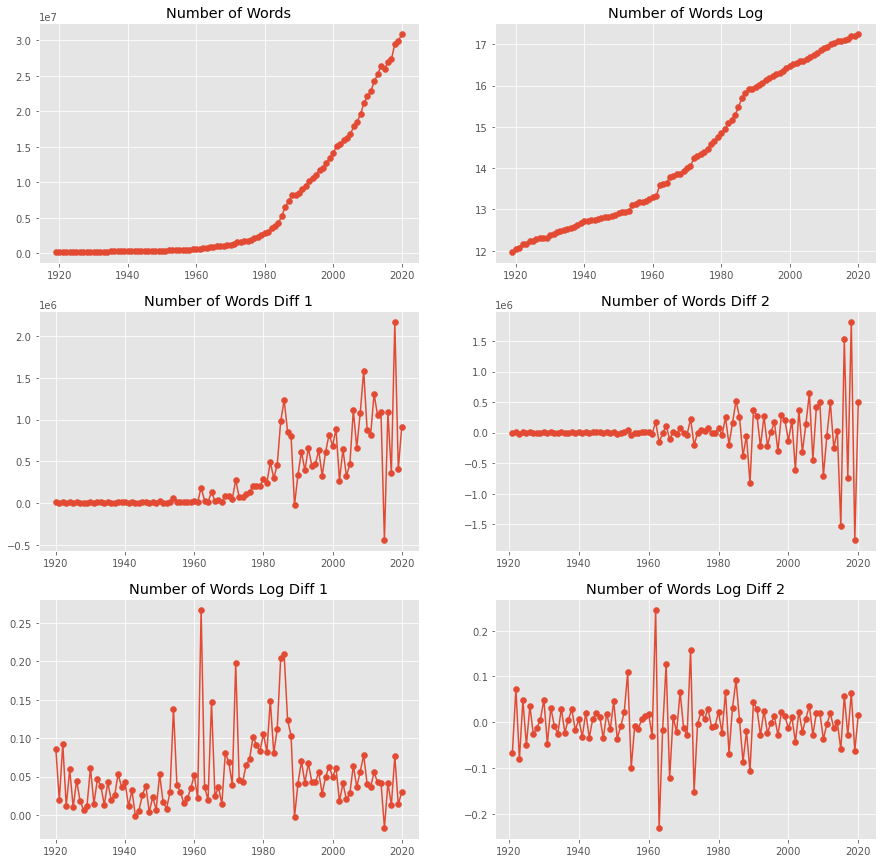

In [401]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

# plot number words
ax[0,0].plot(data.Date, data.NumberWords)
ax[0,0].scatter(data.Date, data.NumberWords)
ax[0,0].set_title("Number of Words")

# plot number words log
ax[0,1].plot(data.Date, data.NumberWordsLog)
ax[0,1].scatter(data.Date, data.NumberWordsLog)
ax[0,1].set_title("Number of Words Log")

# plot number words diff 1
ax[1,0].plot(data.Date[1:], data.NumberWordsDiff1[1:])
ax[1,0].scatter(data.Date[1:], data.NumberWordsDiff1[1:])
ax[1,0].set_title("Number of Words Diff 1")

# plot number words diff 2
ax[1,1].plot(data.Date[2:], data.NumberWordsDiff2[2:])
ax[1,1].scatter(data.Date[2:], data.NumberWordsDiff2[2:])
ax[1,1].set_title("Number of Words Diff 2")

# plot number words log diff 1
ax[2,0].plot(data.Date[1:], data.NumberWordsLogDiff1[1:])
ax[2,0].scatter(data.Date[1:], data.NumberWordsLogDiff1[1:])
ax[2,0].set_title("Number of Words Log Diff 1")

# plot number words log diff 2
ax[2,1].plot(data.Date[2:], data.NumberWordsLogDiff2[2:])
ax[2,1].scatter(data.Date[2:], data.NumberWordsLogDiff2[2:])
ax[2,1].set_title("Number of Words Log Diff 2")

# # plot number words diff 1 log
# ax[3,0].plot(data.Date[1:], data.NumberWordsDiff1Log[1:])
# ax[3,0].scatter(data.Date[1:], data.NumberWordsDiff1Log[1:])
# ax[3,0].set_title("Number of Words Diff 1 Log")

# # plot number words diff 2 log
# ax[3,1].plot(data.Date[2:], data.NumberWordsDiff2Log[2:])
# ax[3,1].scatter(data.Date[2:], data.NumberWordsDiff2Log[2:])
# ax[3,1].set_title("Number of Words Diff 2 Log")

## Fit ARIMA

In [402]:
# !pip install pmdarima 


reg_cols = [s for s in data.columns if re.match("Government", s) is not None]
reg_cols
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function 
model = auto_arima(data['NumberWordsLog'], start_p = 0, start_q = 0,
                          max_p = 10, max_q = 10, max_d = 2,
                          d = None, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True, # set to stepwise
                          #X = data[reg_cols]
                          )           
  
# To print the summary
model.summary()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-326.405, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-331.047, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-329.078, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-247.366, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-334.462, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-336.919, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-334.919, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-334.918, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-337.012, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-338.754, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-337.000, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-330.692, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-334.756, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-336.708, Time=0.08 sec

Best model:  ARIMA(1,1,1)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  102
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 173.377
Date:                Sun, 17 Apr 2022   AIC                           -338.754
Time:                        20:27:33   BIC                           -328.294
Sample:                             0   HQIC                          -334.520
                                - 102                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0041      0.005      0.754      0.451      -0.007       0.015
ar.L1          0.9190      0.097      9.442      0.000       0.728       1.110
ma.L1         -0.7585      0.173     -4.375      0.000      -1.098      -0.419
sigma2         0.0019      0.000     10.593      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               339.32
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             2.16
Prob(H) (two-sided):                  0.34   Kurtosis:                        10.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [403]:
model.pvalues()
model.bse()

array([0.00543654, 0.0973248 , 0.17337151, 0.00017797])

## Interpret params 

In [404]:
pd.DataFrame({"params":model.params(), "exp(params)":np.exp(model.params())})

,params,exp(params)
0,0.004101,1.004109
1,0.918958,2.506677
2,-0.758531,0.468354
3,0.001885,1.001887


In [405]:
params = model.params()
phi1 = params.get("ar.L1", 0) * (model.pvalues().get("ar.L1", 1) < 0.05)
phi2 = params.get("ar.L2", 0) * (model.pvalues().get("ar.L2", 1) < 0.05)
phi3 = params.get("ar.L3", 0) * (model.pvalues().get("ar.L3", 1) < 0.05)
theta = params.get("ma.L1", 0) * (model.pvalues().get("ma.L1", 1) < 0.05)
c = params.get("intercept",0) * (model.pvalues().get("intercept", 1) < 0.05)
sigma2 = params.get("sigma2", 0) * (model.pvalues().get("sigma2", 1) < 0.05)
eps = np.random.normal(0, np.sqrt(sigma2), size = 102)


def manual_predict(t, y, government, trns = lambda x: x):
    # arima(1,1,1)
    # yt1 = y[t-1] if t > 0 else 0
    # yt2 = y[t-2] if t > 1 else 0
    # pred = yt1-phi*(yt1-yt2)+params.get("Government_"+government[t])+eps[t]+theta*eps[t-1]

    # arima(3,1,0)
    p = np.array([1-phi1, phi1-phi2, phi2-phi3, phi3])
    pred = (y[t-4:t][::-1]*p).sum() #+ params.get("Government_"+government[t])+eps[t]
    return pred + c

preds = pd.DataFrame({
    "Date": data.Date[4:],
    "NumberWordsLog": data.NumberWordsLog[4:],
    "model_preds" : model.predict_in_sample(data[reg_cols], start = 4, dynamic = False),
    "manual_preds" : [manual_predict(t, data.NumberWordsLog, government) for t in range(4, len(data.NumberWordsLog))]
})

# plot preds
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.scatter(data.Date, data.NumberWordsLog, label = "Actual", color = "black")
ax.plot(preds.Date, preds.model_preds, label = "Model")
ax.plot(preds.Date, preds.manual_preds, label = "Manual")
ax.legend()
ax.set_title("1-step predictions")

AttributeError: 'numpy.ndarray' object has no attribute 'get'

In [406]:
model.pvalues().get("ar.L1")

AttributeError: 'numpy.ndarray' object has no attribute 'get'

### Significance of params

In [407]:
pd.DataFrame({"p-value":model.pvalues(), "significant" : model.pvalues() < 0.05})

,p-value,significant
0,4.506512e-01,False
1,3.651096e-21,True
2,1.213327e-05,True
3,3.200416e-26,True


In [408]:
sns.color_palette("Set1", n_colors = 5)
col = ["red", "green", "blue", "orange", "magenta"]
col = sns.color_palette("Set1", n_colors = 5)
gov_color = {gov : col[i] for i, gov in enumerate(government.unique())}

## Plot predictions

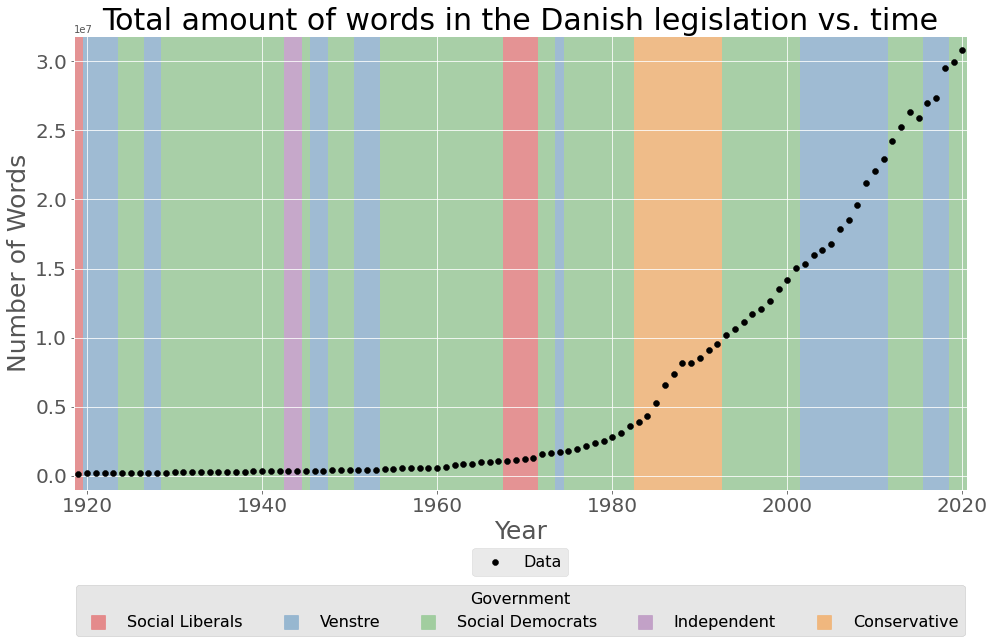

In [409]:
n_steps = 10
future_gov = "Social Democrats"



# reg_pred = pd.DataFrame(np.zeros((n_steps, len(reg_cols))), columns=reg_cols)
# reg_pred["Government_"+future_gov] = 1
preds, pred_int = model.predict(n_periods=n_steps, return_conf_int=True, alpha=0.05)
preds = np.exp(preds)
pred_int = np.exp(pred_int)

dates = np.arange(len(data.NumberWords)) + data.Date.min()

# plot 
fig, ax = plt.subplots(figsize = (16,10))

# set color rectangles to show government
h = data.NumberWords.max()

for i in range(len(dates)):
    ax.add_patch(Rectangle((dates[i]-0.5,-1e7), 1, 5e7, alpha=0.4, color = gov_color[government[i]], lw = 0, zorder = 0))

# for i in range(len(preds)):
#     ax.add_patch(Rectangle((dates[-1]+i+1,0), 1, h, alpha=0.4, color = gov_color[future_gov], lw = 0, zorder = 0))

ax.scatter(dates, data.NumberWords, label = "Data", zorder = 1, color = "black")

# ax.vlines(dates[-1]+.5, 0, h, color = "black", linestyles = "dashed")

ax.set_ylabel("Number of Words",fontsize=25)
ax.set_xlabel("Year",fontsize=25)
ax.set_title(f"Total amount of words in the Danish legislation vs. time",fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend()
ax.legend( loc='lower center', borderaxespad=0.,ncol=5,bbox_to_anchor=(0.5, -0.19),fontsize=16)
ax.add_artist(ax.get_legend())
# ax.scatter(0,0, label ="test")
# ax.legend()
ax.add_artist(plt.legend(handles = [plt.scatter(x = None, y = None, alpha =.4, label=gov, color = gov_color[gov], marker="s",s=200) for gov in gov_color.keys()],
             loc = "lower center",ncol=5, title = "Government", title_fontsize=16,bbox_to_anchor=(0.5, -0.34),fontsize=16))
# ax.vlines(dates[::4], 0, h, color = "black", linestyles = "dashed")
plt.ylim(-0.1e7,h+0.1e7)
plt.margins(x=0)
fig.subplots_adjust(bottom=0.25)
plt.savefig(f"figures/rawdata.pdf")

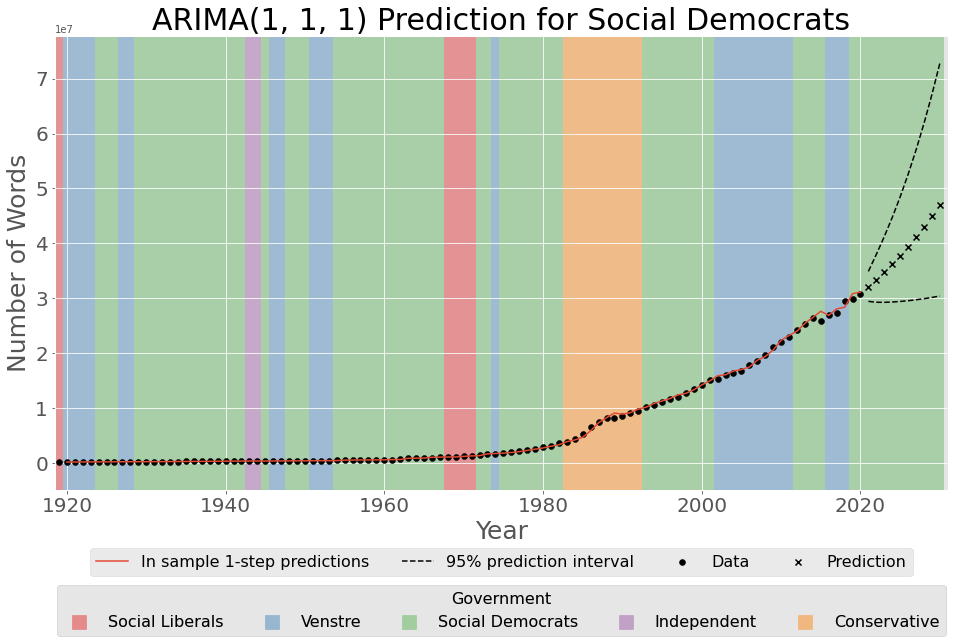

In [410]:
n_steps = 10
future_gov = "Social Democrats"

#future_gov = "Social Liberals"

reg_pred = pd.DataFrame(np.zeros((n_steps, len(reg_cols))), columns=reg_cols)
reg_pred["Government_"+future_gov] = 1
preds, pred_int = model.predict(n_periods=n_steps, X = reg_pred, return_conf_int=True, alpha=0.05)
preds = np.exp(preds)
pred_int = np.exp(pred_int)

dates = np.arange(len(data.NumberWords)) + data.Date.min()

# plot 
fig, ax = plt.subplots(figsize = (16,10))

# set color rectangles to show government
h = max(data.NumberWords.max(), preds.max(), pred_int.max())+1e7
l = min(data.NumberWords.min(), preds.min(), pred_int.min())-1e7

for i in range(len(dates)):
    ax.add_patch(Rectangle((dates[i]-0.5,l), 1, h-l, alpha=0.4, color = gov_color[government[i]], lw = 0, zorder = 0))

for i in range(len(preds)):
     ax.add_patch(Rectangle((dates[-1]-0.5+i+1,l), 1, h-l, alpha=0.4, color = gov_color[future_gov], lw = 0, zorder = 0))

ax.scatter(dates, data.NumberWords, label = "Data", zorder = 1, color = "black")
ax.plot(dates[1:], np.exp(model.predict_in_sample(data[reg_cols][1:],start = 1, dynamic = False)), label = "In sample 1-step predictions", zorder = 2)
ax.scatter(dates[-1]+np.arange(1, n_steps+1), preds, label = "Prediction", zorder = 1, color = "black", marker = "x")
ax.plot(dates[-1]+np.arange(1, n_steps+1), pred_int[:, 0], label = "95% prediction interval", color = "black", linestyle = "--")
ax.plot(dates[-1]+np.arange(1, n_steps+1), pred_int[:, 1], color = "black", linestyle = "--")
# ax.vlines(dates[-1]+.5, 0, h, color = "black", linestyles = "dashed")

ax.set_ylabel("Number of Words",fontsize=25)
ax.set_xlabel("Year",fontsize=25)
ax.set_title(f"ARIMA{model.get_params().get('order')} Prediction for Social Democrats",fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend()
ax.legend( loc='lower center', borderaxespad=0.,ncol=5,bbox_to_anchor=(0.5, -0.19),fontsize=16)
ax.add_artist(ax.get_legend())
# ax.scatter(0,0, label ="test")
# ax.legend()
ax.add_artist(plt.legend(handles = [plt.scatter(x = None, y = None, alpha =.4, label=gov, color = gov_color[gov], marker="s",s=200) for gov in gov_color.keys()],
             loc = "lower center",ncol=5, title = "Government", title_fontsize=16,bbox_to_anchor=(0.5, -0.34),fontsize=16))
# ax.vlines(dates[::4], 0, h, color = "black", linestyles = "dashed")
#plt.ylim(l,h)
plt.ylim(l+0.5e7,h-0.5e7)
plt.plot(2031,0)
plt.margins(x=0)

fig.subplots_adjust(bottom=0.25)
plt.savefig(f"figures/ARIMA{model.get_params().get('order')}.pdf")

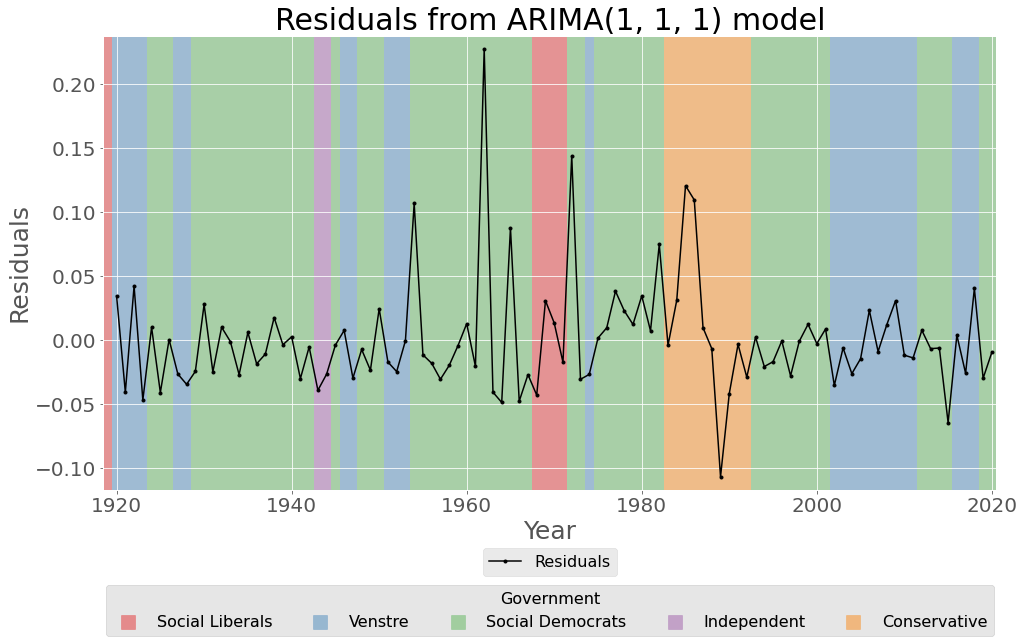

In [411]:
n_steps = 10
future_gov = "Social Democrats"



# reg_pred = pd.DataFrame(np.zeros((n_steps, len(reg_cols))), columns=reg_cols)
# reg_pred["Government_"+future_gov] = 1
preds, pred_int = model.predict(n_periods=n_steps, return_conf_int=True, alpha=0.05)
preds = np.exp(preds)
pred_int = np.exp(pred_int)

dates = np.arange(len(data.NumberWords)) + data.Date.min()

# plot 
fig, ax = plt.subplots(figsize = (16,10))

# set color rectangles to show government
h = model.resid()[1:].max()+1
l = model.resid()[1:].min()-1

for i in range(len(dates)):
    ax.add_patch(Rectangle((dates[i]-0.5,l), 1, h-l, alpha=0.4, color = gov_color[government[i]], lw = 0, zorder = 0))

# for i in range(len(preds)):
#     ax.add_patch(Rectangle((dates[-1]+i+1,0), 1, h, alpha=0.4, color = gov_color[future_gov], lw = 0, zorder = 0))

#ax.scatter(dates, data.NumberWords, label = "Data", zorder = 1, color = "black")
ax.plot(dates[1:], model.resid()[1:],'k.-', label = "Residuals", zorder = 2)


ax.set_ylabel("Residuals",fontsize=25)
ax.set_xlabel("Year",fontsize=25)
ax.set_title(f"Residuals from ARIMA{model.get_params().get('order')} model",fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
# ax.legend()
ax.legend( loc='lower center', borderaxespad=0.,ncol=5,bbox_to_anchor=(0.5, -0.19),fontsize=16)
ax.add_artist(ax.get_legend())
# ax.scatter(0,0, label ="test")
# ax.legend()
ax.add_artist(plt.legend(handles = [plt.scatter(x = None, y = None, alpha =.4, label=gov, color = gov_color[gov], marker="s",s=200) for gov in gov_color.keys()],
             loc = "lower center",ncol=5, title = "Government", title_fontsize=16,bbox_to_anchor=(0.5, -0.34),fontsize=16))
# ax.vlines(dates[::4], 0, h, color = "black", linestyles = "dashed")

plt.ylim(l+0.99,h-0.99)
#plt.ylim(l+0.9e6,h-0.9e6)
plt.margins(x=0)

fig.subplots_adjust(bottom=0.25)
plt.savefig(f"figures/resarima111.pdf")

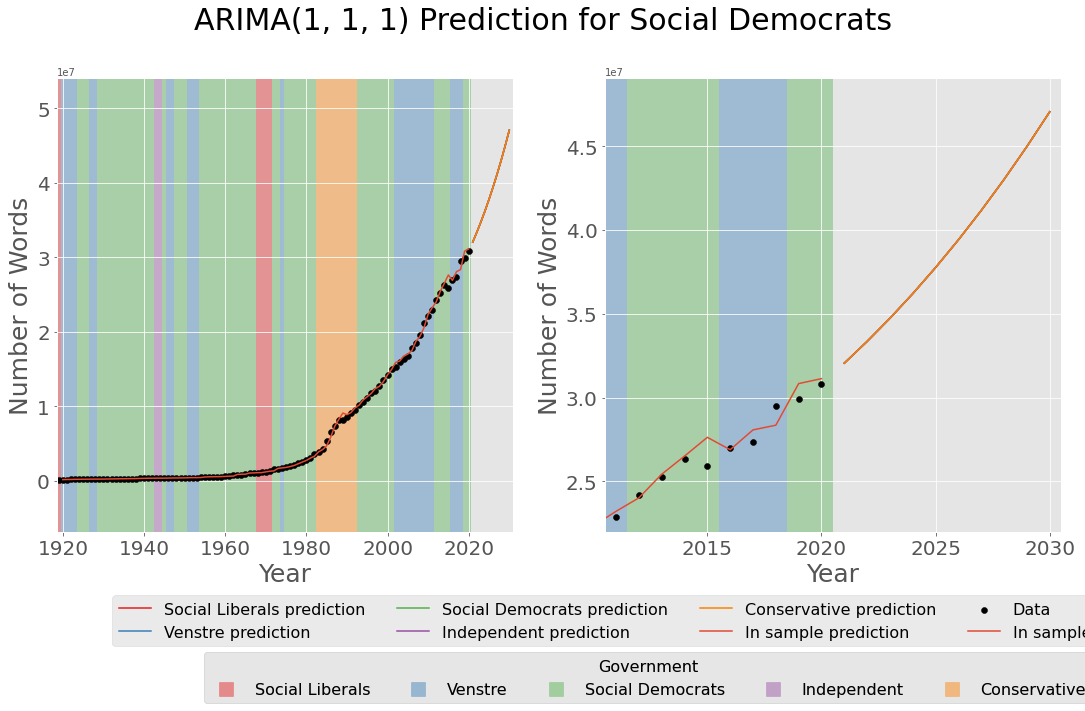

In [412]:
n_steps = 10

# plot 
fig, ax = plt.subplots(1,2,figsize = (18,10))

dates = np.arange(len(data.NumberWords)) + data.Date.min()

for gov in gov_color.keys():
    reg_pred = pd.DataFrame(np.zeros((n_steps, len(reg_cols))), columns=reg_cols)
    reg_pred["Government_"+gov] = 1
    preds= model.predict(n_periods=n_steps, X = reg_pred)
    preds = np.exp(preds)
    ax[0].plot(dates[-1]+np.arange(1, n_steps+1), preds, label = gov + " prediction", zorder = 1, color = gov_color[gov])


# set color rectangles to show government
h = max(data.NumberWords.max(), preds.max())+1e7
l = min(data.NumberWords.min(), preds.min())-1e7

for i in range(len(dates)):
    ax[0].add_patch(Rectangle((dates[i]-0.5,l), 1, h-l, alpha=0.4, color = gov_color[government[i]], lw = 0, zorder = 0))

ax[0].scatter(dates, data.NumberWords, label = "Data", zorder = 1, color = "black")
ax[0].plot(dates[1:], np.exp(model.predict_in_sample(data[reg_cols][1:], start = 1)), label = "In sample prediction", zorder = 2)


ax[0].set_ylabel("Number of Words",fontsize=25)
ax[0].set_xlabel("Year",fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=20)
# ax.vlines(dates[::4], 0, h, color = "black", linestyles = "dashed")
#plt.ylim(l,h)
ax[0].set_ylim(l+0.3e7,h-0.3e7)
ax[0].plot(2031,0)
ax[0].margins(x=0)





for i, gov in enumerate(gov_color.keys()):
    reg_pred = pd.DataFrame(np.zeros((n_steps, len(reg_cols))), columns=reg_cols)
    reg_pred["Government_"+gov] = 1
    preds= model.predict(n_periods=n_steps, X = reg_pred)
    preds = np.exp(preds)
    ax[1].plot(dates[-1]+np.arange(1, n_steps+1), preds, zorder = 1, color = gov_color[gov])


# set color rectangles to show government
h = max(data.NumberWords[-prev_steps:].max(), preds.max())+1.e7

for i in range(len(dates)):
    ax[1].add_patch(Rectangle((dates[i]-0.5,0), 1, h, alpha=0.4, color = gov_color[government[i]], lw = 0, zorder = 0))

ax[1].scatter(dates, data.NumberWords, zorder = 1, color = "black")
dates = np.arange(len(data.NumberWords)) + data.Date.min()
ax[1].plot(dates[1:], np.exp(model.predict_in_sample(data[reg_cols][1:], start = 1)), label = "In sample prediction", zorder = 2)

ax[1].set_ylabel("Number of Words",fontsize=25)
ax[1].set_xlabel("Year",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=20)
fig.suptitle(f"ARIMA{model.get_params().get('order')} Prediction for Social Democrats",fontsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=20)
# ax.legend()
fig.legend( loc='lower center', borderaxespad=0.,ncol=4,bbox_to_anchor=(0.5, 0.09),fontsize=16)
#x[0].get_legend())
# ax.scatter(0,0, label ="test")
# ax.legend()
fig.add_artist(fig.legend(handles = [plt.scatter(x = None, y = None, alpha =.4, label=gov, color = gov_color[gov], marker="s",s=200) for gov in gov_color.keys()],
             loc = "lower center",ncol=5, title = "Government", title_fontsize=16,bbox_to_anchor=(0.5, 0),fontsize=16))
# ax.vlines(dates[::4], 0, h, color = "black", linestyles = "dashed")
ax[1].set_xlim(2010.5, 2030.5)
ax[1].set_ylim(2.2e7, h-0.8e7)
ax[1].plot(2031,0)
ax[1].margins(x=0)


plt.subplots_adjust(bottom=0.25)

#fig.subplots_adjust(bottom=0.25)
plt.savefig(f"figures/ARIMA{model.get_params().get('order')}_predictions.pdf")

TypeError: 'AxesSubplot' object is not subscriptable

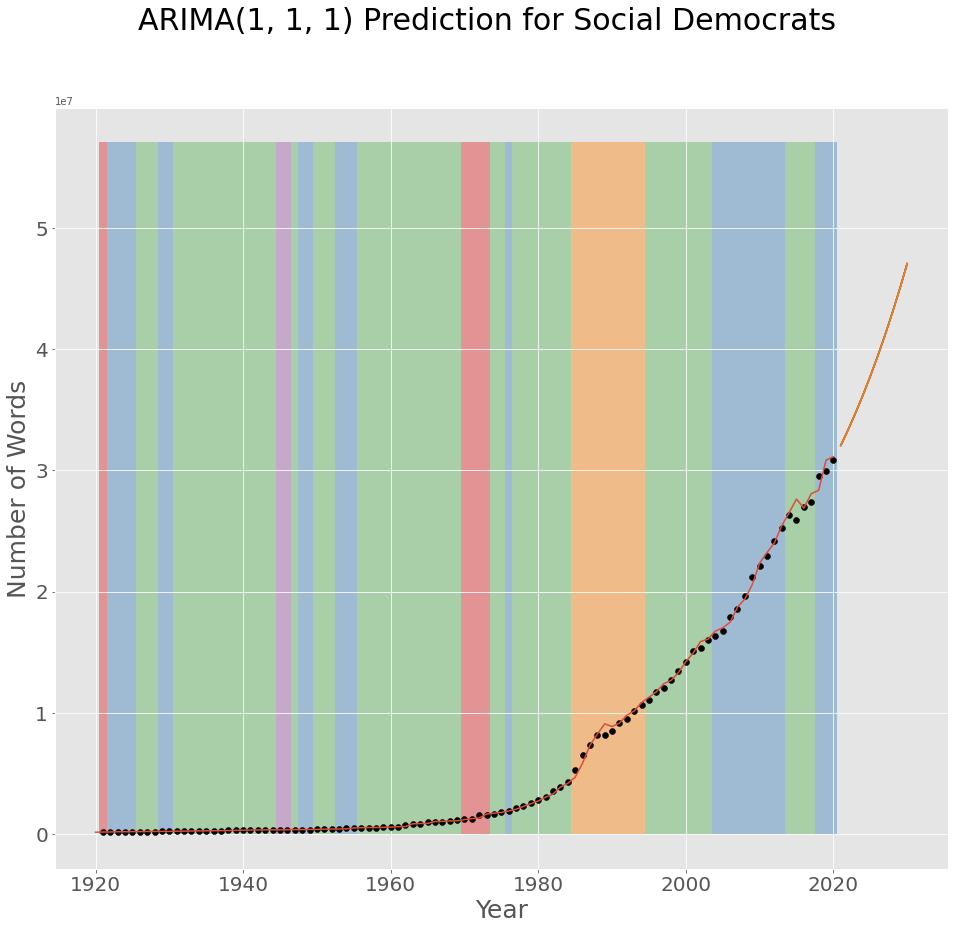

In [413]:
n_steps = 10

# plot 
fig, ax = plt.subplots(figsize = (16,14))

dates = np.arange(len(data.NumberWords)) + data.Date.min()
dates = dates[-prev_steps:]

for i, gov in enumerate(gov_color.keys()):
    reg_pred = pd.DataFrame(np.zeros((n_steps, len(reg_cols))), columns=reg_cols)
    reg_pred["Government_"+gov] = 1
    preds= model.predict(n_periods=n_steps, X = reg_pred)
    preds = np.exp(preds)
    ax.plot(dates[-1]+np.arange(1, n_steps+1), preds, label = gov + " prediction", zorder = 1, color = gov_color[gov])


# set color rectangles to show government
h = max(data.NumberWords[-prev_steps:].max(), preds.max())+1.e7

for i in range(len(dates)):
    ax.add_patch(Rectangle((dates[i]-0.5,0), 1, h, alpha=0.4, color = gov_color[government[i]], lw = 0, zorder = 0))

ax.scatter(dates, data.NumberWords[-prev_steps:], label = f"Last {prev_steps} observations", zorder = 1, color = "black")
dates = np.arange(len(data.NumberWords)) + data.Date.min()
ax.plot(dates[1:], np.exp(model.predict_in_sample(data[reg_cols][1:], start = 1)), label = "In sample prediction", zorder = 2)

ax.set_ylabel("Number of Words",fontsize=25)
ax.set_xlabel("Year",fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.suptitle(f"ARIMA{model.get_params().get('order')} Prediction for Social Democrats",fontsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=20)
# ax.legend()
fig.legend( loc='lower center', borderaxespad=0.,ncol=4,bbox_to_anchor=(0.5, 0.2),fontsize=16)
#x[0].get_legend())
# ax.scatter(0,0, label ="test")
# ax.legend()
fig.add_artist(fig.legend(handles = [plt.scatter(x = None, y = None, alpha =.4, label=gov, color = gov_color[gov], marker="s",s=200) for gov in gov_color.keys()],
             loc = "lower center",ncol=5, title = "Government", title_fontsize=16,bbox_to_anchor=(0.5, .08),fontsize=16))
# ax.vlines(dates[::4], 0, h, color = "black", linestyles = "dashed")
ax.set_xlim(2010.5, 2030.5)
ax.set_ylim(2.2e7, h-0.8e7)
plt.plot(2031,0)
plt.margins(x=0)
plt.xticks(np.arange(2012, 2032, 2))

plt.savefig(f"figures/ARIMA{model.get_params().get('order')}_predictions_zoom.pdf")

## Plot residuals

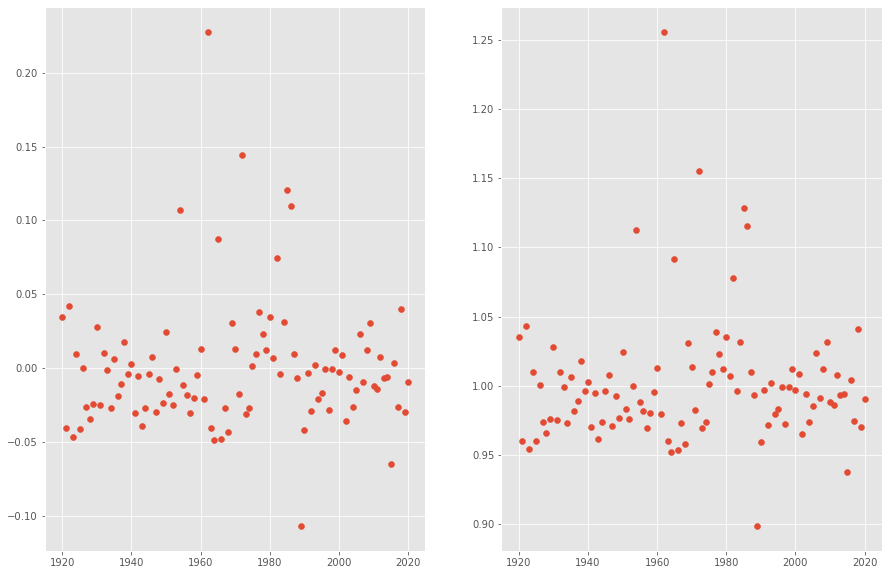

In [414]:
dates = np.arange(len(data.NumberWords)) + data.Date.min()

fig, ax = plt.subplots(1,2,figsize = (15,10))
ax[0].scatter(dates[1:], model.resid()[1:])
ax[1].scatter(dates[1:], np.exp(model.resid())[1:])

In [415]:
plt.scatter(preds.Date[1:], preds.NumberWordsLog[1:]-preds.model_preds[1:], label = "Residuals", zorder = 1, color = "black")

AttributeError: 'numpy.ndarray' object has no attribute 'Date'

In [ ]:
preds

,Date,NumberWordsLog,model_preds,manual_preds
1,NaN,NaN,12.081851,1.304350
2,1921.0,12.066333,12.087361,11.941260
3,1922.0,12.158693,12.102883,12.038978
4,1923.0,12.170207,12.207668,12.154376
5,1924.0,12.229530,12.223584,12.163591
...,...,...,...,...
97,2016.0,17.111316,17.094139,17.160282
98,2017.0,17.124454,17.151329,17.112899
99,2018.0,17.200697,17.160787,17.133275
100,2019.0,17.214419,17.256812,17.088810
